## Teoría de de Árboles

In [1]:
import pandas as pd
url = 'https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/vehicles_train.csv'
train = pd.read_csv(url)

In [2]:
train.head()

,price,year,miles,doors,vtype
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car


In [3]:
train["predicción"] = train.price.mean()

In [4]:
train.head()

,price,year,miles,doors,vtype,predicción
0,22000,2012,13000,2,car,6571.428571
1,14000,2010,30000,2,car,6571.428571
2,13000,2010,73500,4,car,6571.428571
3,9500,2009,78000,4,car,6571.428571
4,9000,2007,47000,4,car,6571.428571


In [5]:
train["pred"] = train.loc[train["year"]<2009,"price"].mean()

In [6]:
train.head()

,price,year,miles,doors,vtype,predicción,pred
0,22000,2012,13000,2,car,6571.428571,3350.0
1,14000,2010,30000,2,car,6571.428571,3350.0
2,13000,2010,73500,4,car,6571.428571,3350.0
3,9500,2009,78000,4,car,6571.428571,3350.0
4,9000,2007,47000,4,car,6571.428571,3350.0


In [8]:
(((train["price"] - train["pred"])**2).mean()**5)

1.977112514592836e+38

In [9]:
train_izq = train.loc[train["year"]<2009].copy()

In [10]:
train_izq

,price,year,miles,doors,vtype,predicción,pred
4,9000,2007,47000,4,car,6571.428571,3350.0
5,4000,2006,124000,2,car,6571.428571,3350.0
6,3000,2004,177000,4,car,6571.428571,3350.0
7,2000,2004,209000,4,truck,6571.428571,3350.0
8,3000,2003,138000,2,car,6571.428571,3350.0
9,1900,2003,160000,4,car,6571.428571,3350.0
10,2500,2003,190000,2,truck,6571.428571,3350.0
11,5000,2001,62000,4,car,6571.428571,3350.0
12,1800,1999,163000,2,truck,6571.428571,3350.0
13,1300,1997,138000,4,car,6571.428571,3350.0


In [14]:
def error_año (train,year):
    train['pred'] = train.loc[train.year<year, 'price'].mean()
    train.loc[train.year>=year, 'pred'] = train.loc[train.year>=year, 'price'].mean()
    print ((((train['price'] - train['pred'])**2).mean()) ** 0.5)

In [17]:
def error_miles(train, miles):
    train['pred'] = train.loc[train.miles<miles, 'price'].mean()
    train.loc[train.miles>=miles, 'pred'] = train.loc[train.miles>=miles, 'price'].mean()
    print ((((train['price'] - train['pred'])**2).mean()) ** 0.5)

In [18]:
for year in train_izq.year.unique():
    print('Year ',year)
    error_año(train_izq, year)

Year  2007
1053.3544301684763
Year  2006
1475.0847433283282
Year  2004
1942.893031881409
Year  2003
2115.5208747324077
Year  2001
1961.249601657066
Year  1999
2046.8403835071158
Year  1997
2157.8924903711027


## Manera sofisticada =)

In [19]:
train['vtype'] = train.vtype.map({'car':0, 'truck':1})

In [22]:
train
feature_cols = ["year","miles","doors","vtype"]
X = train[feature_cols]
y = train["price"]

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

In [36]:
arbolito = DecisionTreeRegressor(random_state=1234)
Scores = (cross_val_score(arbolito,X,y,cv=3,scoring="neg_mean_squared_error"))

In [37]:
np.mean(np.sqrt(-Scores))

4581.249765469214

In [42]:
arbolito = DecisionTreeRegressor(max_depth=100,random_state=1234)
Scores = (cross_val_score(arbolito,X,y,cv=13,scoring="neg_mean_squared_error"))
np.mean(np.sqrt(-Scores))

2392.5480182640654

In [43]:
max_depth_range = range(1, 8)

RMSE_scores = []

for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0, 0.5, 'RMSE (lower is better)')

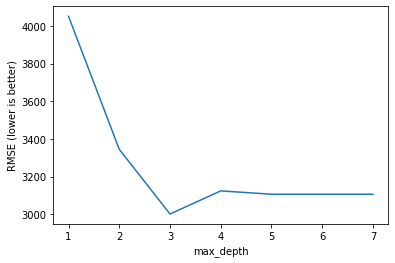

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [45]:
arbolito = DecisionTreeRegressor(max_depth=3,random_state=1234)
arbolito.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [47]:
from sklearn.tree import export_graphviz

In [50]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/vehicles_test.csv'
test = pd.read_csv(url)
test['vtype'] = test.vtype.map({'car':0, 'truck':1})
test

,price,year,miles,doors,vtype
0,3000,2003,130000,4,1
1,6000,2005,82500,4,0
2,12000,2010,60000,2,0


In [52]:
X_test = test[feature_cols]
y_test = test.price
y_pred = arbolito.predict(X_test)
y_pred

array([ 4000.,  5000., 13500.])

In [53]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

1190.2380714238084

In [86]:

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/titanic.csv'
titanic = pd.read_csv(url)

titanic['Sex'] = titanic.Sex.map({'female':0, 'male':1})


titanic.Age.fillna(titanic.Age.median(), inplace=True)


embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked')
embarked_dummies.drop(embarked_dummies.columns[0], axis=1, inplace=True)


titanic = pd.concat([titanic, embarked_dummies], axis=1)


titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,1


In [56]:
feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S']
X = titanic[feature_cols]
y = titanic.Survived

In [57]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
cm=confusion_matrix(y,treeclf.predict(X))

In [85]:
cm

array([[524,  25],
       [133, 209]])

In [87]:
from sklearn.metrics import accuracy_score

In [89]:
accuracy_score(y,treeclf.predict(X),normalize=True)### Esta es la metrica más importante

0.8226711560044894

In [90]:
## Escenario 2

In [91]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,1


In [203]:
feature_cols = ['Pclass', 'Sex','SibSp','Parch']
X = titanic[feature_cols]
y = titanic.Survived

In [204]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=5, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [205]:
cm=confusion_matrix(y,treeclf.predict(X))

In [206]:
cm

array([[509,  40],
       [129, 213]])

In [207]:
accuracy_score(y,treeclf.predict(X),normalize=True)### Esta es la metrica más importante

0.8103254769921436

In [186]:
from sklearn import tree

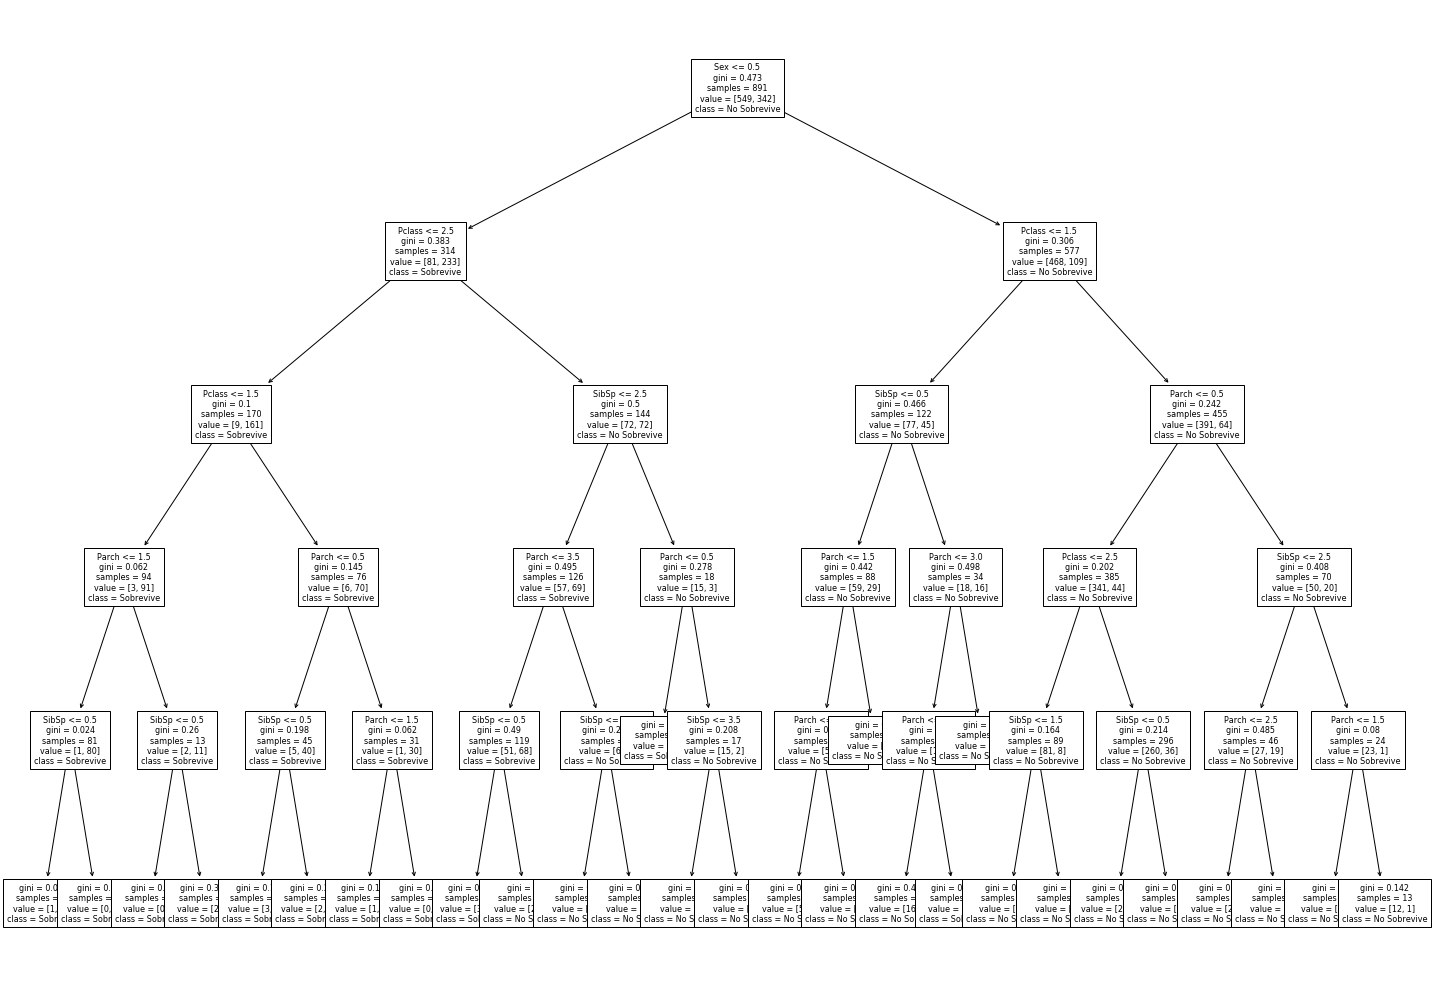

In [210]:
plt.figure(figsize=(25, 18))
tree.plot_tree(treeclf, fontsize=8,
               feature_names=feature_cols,
              class_names=titanic["Survived"])
plt.show()

In [178]:
import pandas as pd
titanic.Survived=titanic.Survived.replace(1,"Sobrevive")

In [179]:
titanic.Survived=titanic.Survived.replace(0,"No Sobrevive")

In [180]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_S
0,1,No Sobrevive,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,Sobrevive,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,Sobrevive,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,Sobrevive,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,No Sobrevive,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,No Sobrevive,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,Sobrevive,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,0,1
888,889,No Sobrevive,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,1
889,890,Sobrevive,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,0,0
